# Packages et chemins

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
repertoire_data = 'Data\\'
fichier_meteo = 'weather_out.csv'

# Fichier RTE

In [6]:
# Chargement du df principal, toutes les années, données agrégées au pas journalier
df_rte = pd.read_csv('Data/rte_jour_regions.csv', sep=';', encoding='utf-8')

# Chargement du df avec toutes les années, données agrégées au pas mensuel
df_rte_mois = pd.read_csv('Data/rte_mois_regions.csv', sep=';', encoding='utf-8')

In [7]:
print(df_rte.info())
df_rte.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39072 entries, 0 to 39071
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Date                    39072 non-null  object
 1   Jour_semaine            39072 non-null  int64 
 2   Annee                   39072 non-null  int64 
 3   Mois                    39072 non-null  object
 4   Code INSEE région       39072 non-null  int64 
 5   Région                  39072 non-null  object
 6   Consommation (MW)       39072 non-null  int64 
 7   Thermique (MW)          39072 non-null  int64 
 8   Nucléaire (MW)          39072 non-null  int64 
 9   Eolien (MW)             39072 non-null  int64 
 10  Solaire (MW)            39072 non-null  int64 
 11  Hydraulique (MW)        39072 non-null  int64 
 12  Pompage (MW)            39072 non-null  int64 
 13  Bioénergies (MW)        39072 non-null  int64 
 14  Ech. physiques (MW)     39072 non-null  int64 
 15  Pr

,Date,Jour_semaine,Annee,Mois,Code INSEE région,Région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Production totale (MW)
0,2013-01-01,1,2013,2013-01,11,Île-de-France,399392,32478,0,340,100,0,0,6333,360051,39251
1,2013-01-01,1,2013,2013-01,24,Centre-Val de Loire,103218,4236,438965,12262,357,1596,0,1150,-355429,458566
2,2013-01-01,1,2013,2013-01,27,Bourgogne-Franche-Comté,110467,10996,0,3737,57,5493,-5,596,89409,20874
3,2013-01-01,1,2013,2013-01,28,Normandie,155860,20427,384145,6648,179,693,0,2523,-258889,414615
4,2013-01-01,1,2013,2013-01,32,Hauts-de-France,253829,38592,211166,25444,308,46,0,3130,-25001,278686


## Cartes

In [8]:
import geopandas as gpd
# import geoplot
# import geoplot.crs as gcrs

ModuleNotFoundError: No module named 'geopandas'

In [ ]:
geo_data = gpd.read_file(repertoire_data + 'regions.geojson')

In [ ]:
geo_data.head()

In [ ]:
geo_data = geo_data.drop([9, 10, 11, 12, 13], axis=0)

In [ ]:
# Croisement des data geojson avec la production
df_rte_sum = df_rte[df_rte['Annee']==2019].groupby('Code INSEE région', as_index=False).agg(sum)

In [ ]:
df_rte_sum['Code INSEE région'] = df_rte_sum['Code INSEE région'].astype(int)
geo_data['code'] = geo_data['code'].astype(int)
df_rte_sum = df_rte_sum.merge(geo_data, left_on='Code INSEE région', right_on='code', how='inner')

In [ ]:
geo = gpd.GeoDataFrame(df_rte_sum, geometry='geometry')

In [ ]:
fig, axes = plt.subplots(figsize=(20, 10), ncols=2, nrows=1)
axes[0] = fig.add_subplot(121)
geo.plot(column='Consommation (MW)', cmap='Blues', ax=axes[0])
axes[0].axis('off')
vmin = geo['Consommation (MW)'].min()
vmax = geo['Consommation (MW)'].max()
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
axes[0].set_title('Consommation par région')

axes[1] = fig.add_subplot(122)
geo.plot(column='Production totale (MW)', cmap='Blues', ax=axes[1])
axes[1].axis('off')
vmin = geo['Production totale (MW)'].min()
vmax = geo['Production totale (MW)'].max()
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm._A = []
cbar = fig.colorbar(sm)
axes[1].set_title('Production par région');

Les cartes ci-dessus montrent la consommation et la production pour chaque région. On constate que dans certaines régions, la production est faible voire inexistante, mais la consommation est forte (par exemple l'Ile de France).

## Catplot consommation - production

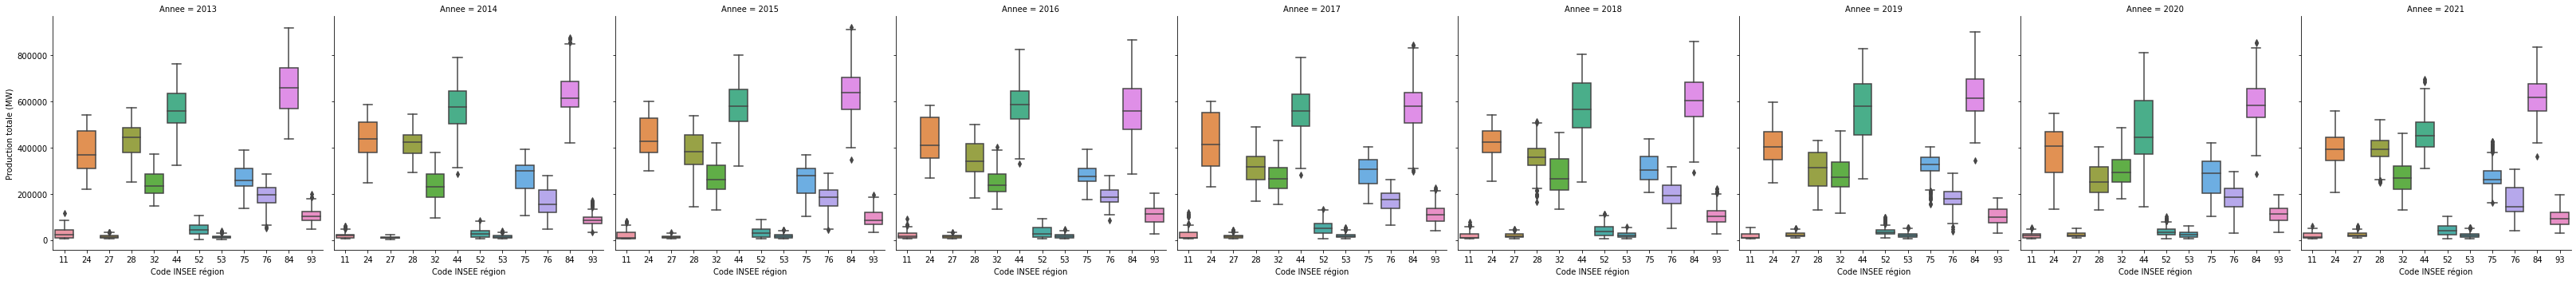

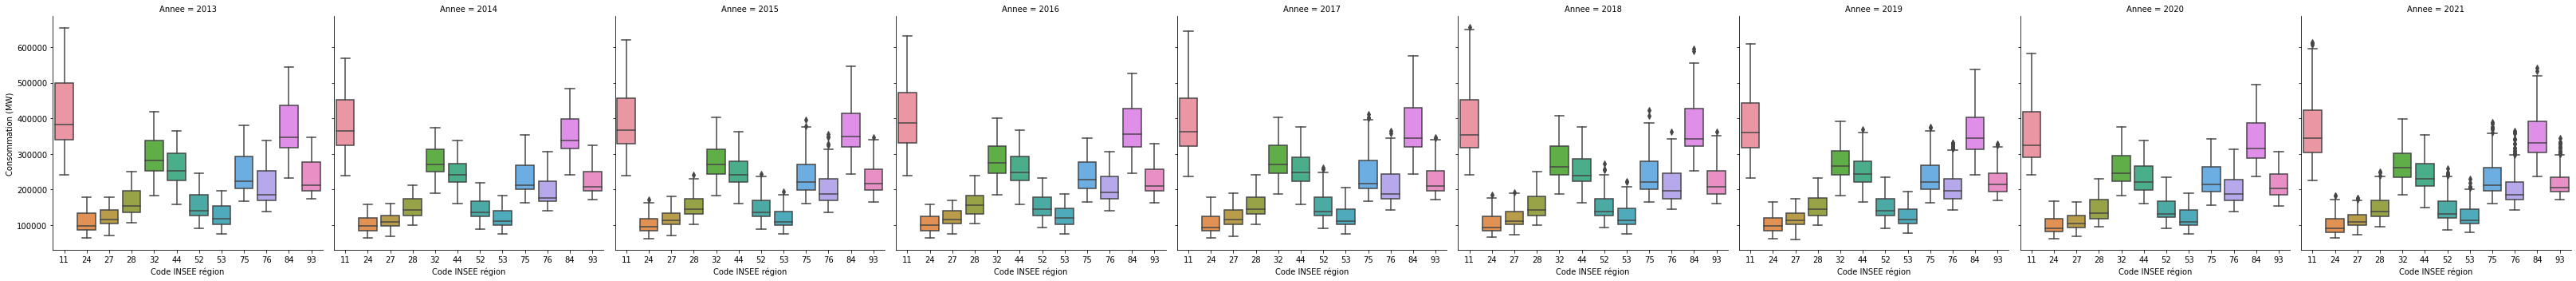

In [9]:
sns.catplot(x='Code INSEE région', y='Production totale (MW)', kind='box', col='Annee', data=df_rte)
sns.catplot(x='Code INSEE région', y='Consommation (MW)', kind='box', col='Annee', data=df_rte);

La conclusion est la même que l'analyse avec les cartes. On note en plus une constance d'une année sur l'autre.

## Exploration des données

### Calcul de la consommation totale par an

In [10]:
for annee in range(2013, 2022):
    conso_annuelle = df_rte[df_rte['Annee']==annee]['Consommation (MW)'].sum()/2
    print('Conso totale', annee, ':', int(conso_annuelle/1000000), 'TWh')

Conso totale 2013 : 492 TWh
Conso totale 2014 : 462 TWh
Conso totale 2015 : 473 TWh
Conso totale 2016 : 480 TWh
Conso totale 2017 : 479 TWh
Conso totale 2018 : 475 TWh
Conso totale 2019 : 470 TWh
Conso totale 2020 : 446 TWh
Conso totale 2021 : 418 TWh


## Visualisation de données

### Productions mensuelles empilées par filière, pour une année choisie

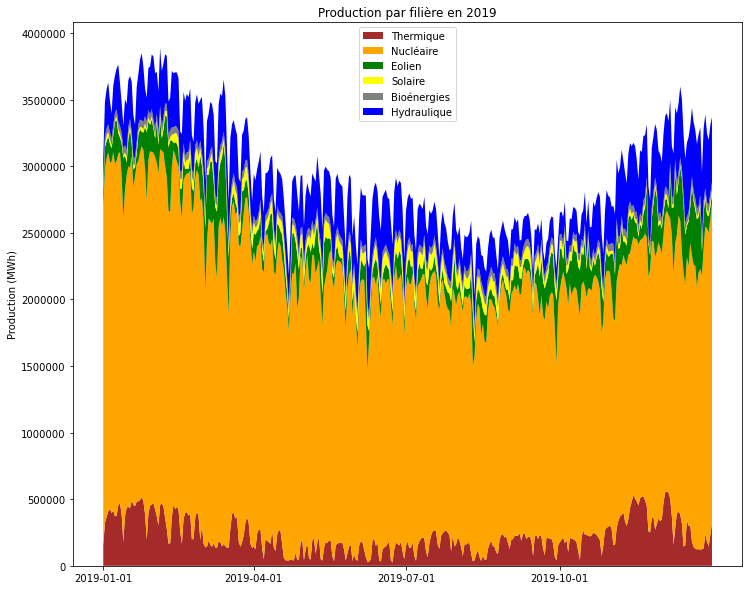

In [21]:
annee = 2019

plt.figure(figsize=(12, 10))

plt.stackplot(
    'Date',
    'Thermique (MW)',
    'Nucléaire (MW)',
    'Eolien (MW)',
    'Solaire (MW)',
    'Bioénergies (MW)',
    'Hydraulique (MW)',
    data=df_rte[df_rte['Annee']==annee].groupby('Date', as_index=False).agg(sum),
    labels=['Thermique', 'Nucléaire', 'Eolien', 'Solaire', 'Bioénergies', 'Hydraulique'],
    colors=['brown', 'orange', 'green', 'yellow', 'grey', 'blue']
)
plt.ylabel('Production (MWh)')
plt.xticks([str(annee)+'-01-01', str(annee)+'-04-01', str(annee)+'-07-01', str(annee)+'-10-01'])
plt.ticklabel_format(axis="y", style="plain")
plt.title('Production par filière en ' + str(annee))
plt.legend(loc='upper center');

La majorité de la production provient de la filière nucléaire. La consommation d'électricité est nettement plus faible en été qu'en hiver.

### Production mensuelle par filière pour une année choisie

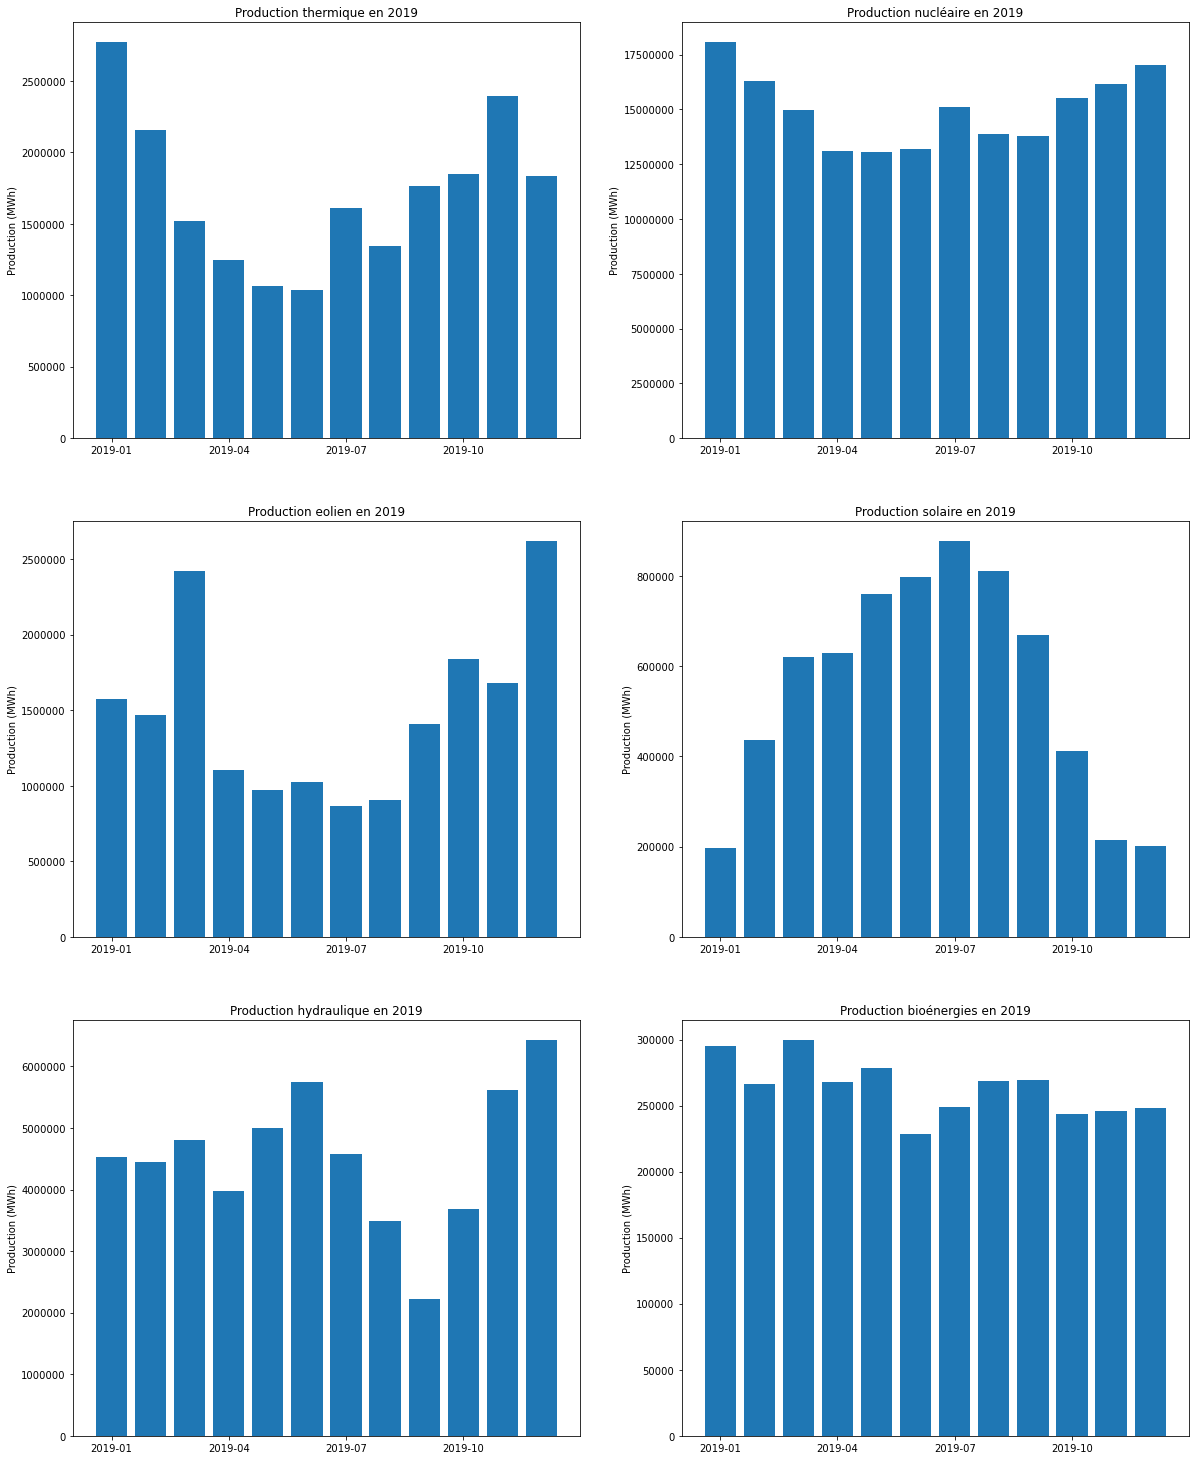

In [32]:
annee = 2019

fig, axes = plt.subplots(3, 2, figsize=(20, 26))

filieres = ['Thermique (MW)'
            , 'Nucléaire (MW)'
            , 'Eolien (MW)'
            , 'Solaire (MW)'
            , 'Hydraulique (MW)'
            , 'Bioénergies (MW)'
           ]

for (index, filiere), ax in zip(enumerate(filieres), axes.flatten()):
    nom_filiere = str.lower(filiere[:-5])
    ax.bar(x=df_rte_mois[df_rte_mois['Annee']==annee]['Mois']
                  , height=df_rte_mois[df_rte_mois['Annee']==annee][filiere])
    ax.set_ylabel('Production (MWh)')
    ax.set_title('Production '+ nom_filiere + ' en '+str(annee))
    ax.set_xticks([str(annee)+'-01', str(annee)+'-04', str(annee)+'-07', str(annee)+'-10'])
    ax.ticklabel_format(axis="y", style="plain")

La saisonnalité n'est pas la même selon la filière de production. La production solaire est plus importante l'été, l'éolien connait des pics en hiver.
Le nucléaire connait également une saisonnalité en relation avec la consommation (plus de production l'hiver).

### Différence entre consommation et production et mise en rapport avec les échanges physiques
Application sur l'année 2015.

In [33]:
annee = 2015

df_rte[df_rte['Annee']==annee].drop(['Annee', 'Jour_semaine', 'Code INSEE région'], axis=1).groupby(
    'Date', as_index=False
).agg(sum).iloc[:, :14]

,Date,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Production totale (MW)
0,2015-01-01,3227643,184162,2777871,102247,22740,316271,-53793,43437,-165244,3392935
1,2015-01-02,3312086,227777,2800569,157858,16596,360983,-35359,43188,-259563,3571612
2,2015-01-03,3076515,192556,2752899,210598,11718,282466,-64132,43688,-353300,3429793
3,2015-01-04,2826180,184923,2656057,60118,13847,290680,-87767,42954,-334647,3160812
4,2015-01-05,3421196,385788,2790575,32011,19572,418233,-38364,41631,-228244,3649446
...,...,...,...,...,...,...,...,...,...,...,...
360,2015-12-27,2451094,120054,2299805,161818,21009,157193,-55827,49014,-301962,2753066
361,2015-12-28,2730223,174984,2518903,246609,16513,211514,-37632,48105,-448722,3178996
362,2015-12-29,2747346,231263,2505395,164566,15700,169137,-41576,47803,-344931,3092288
363,2015-12-30,2801885,141322,2558115,234147,24188,161790,-48840,49583,-318412,3120305


In [34]:
df_rte['Conso-Prod'] = df_rte['Consommation (MW)'] - df_rte['Production totale (MW)']

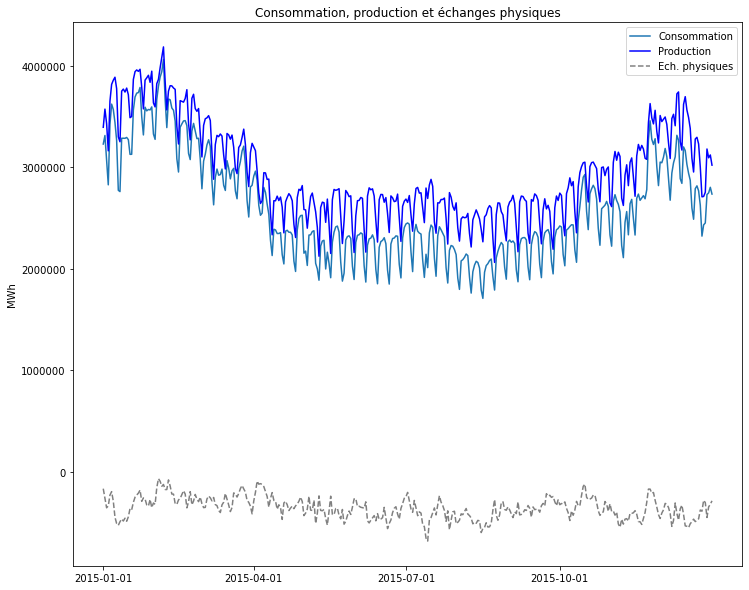

In [37]:
annee = 2015

fig = plt.figure(figsize=(12,10))

plt.plot(df_rte[df_rte['Annee']==annee].groupby('Date').agg(sum)['Consommation (MW)'], 
         label='Consommation')
plt.plot(df_rte[df_rte['Annee']==annee].groupby('Date').agg(sum)['Production totale (MW)'], 
         linestyle='-', 
         label='Production', 
         color='b'
        )

plt.plot(df_rte[df_rte['Annee']==annee].groupby('Date', as_index=False).agg(sum)['Ech. physiques (MW)'], 
         linestyle='--', 
         label='Ech. physiques', 
         color='grey'
        )
plt.ylabel('MWh')
plt.xticks(['2015-01-01', '2015-04-01', '2015-07-01', '2015-10-01'])
plt.title('Consommation, production et échanges physiques')
plt.ticklabel_format(axis="y", style="plain")
plt.legend();

--> La différence entre production et consommation pourrait correspondre aux échanges physiques. Pour s'en convaincre on représente le delta entre consommation et production face aux échanges physiques.

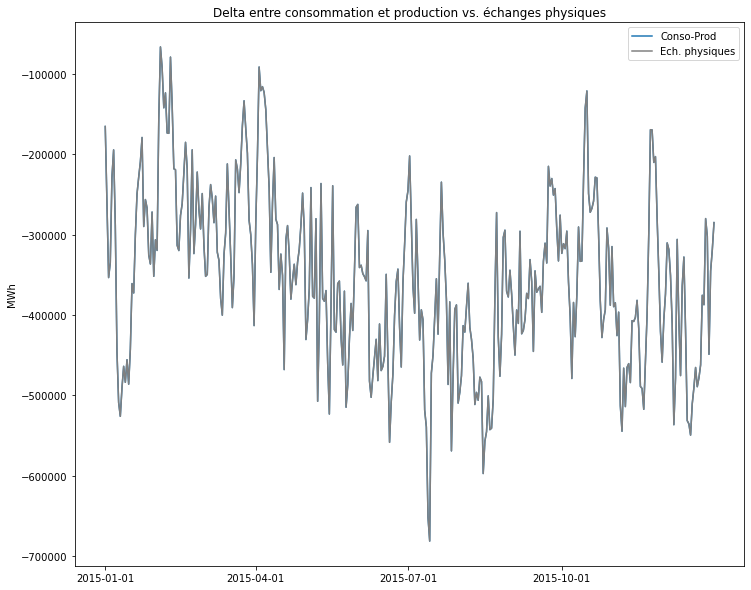

In [39]:
plt.figure(figsize=(12,10))

plt.plot(df_rte[df_rte['Annee']==annee].groupby('Date').agg(sum)['Conso-Prod'], 
         linestyle='-', 
         label='Conso-Prod')
plt.plot(df_rte[df_rte['Annee']==annee].groupby('Date').agg(sum)['Ech. physiques (MW)'], 
         linestyle='-', 
         color='grey', 
         label='Ech. physiques'
        )
plt.ylabel('MWh')
plt.xticks(['2015-01-01', '2015-04-01', '2015-07-01', '2015-10-01'])
plt.title('Delta entre consommation et production vs. échanges physiques')
plt.legend();

**--> Les deux courbes sont parfaitement superposées, donc les échanges physiques correspondent bien à la différence entre consommation et production, et reflètent donc les imports et exports aux frontières françaises.**

## Consommation en fonction du jour de la semaine

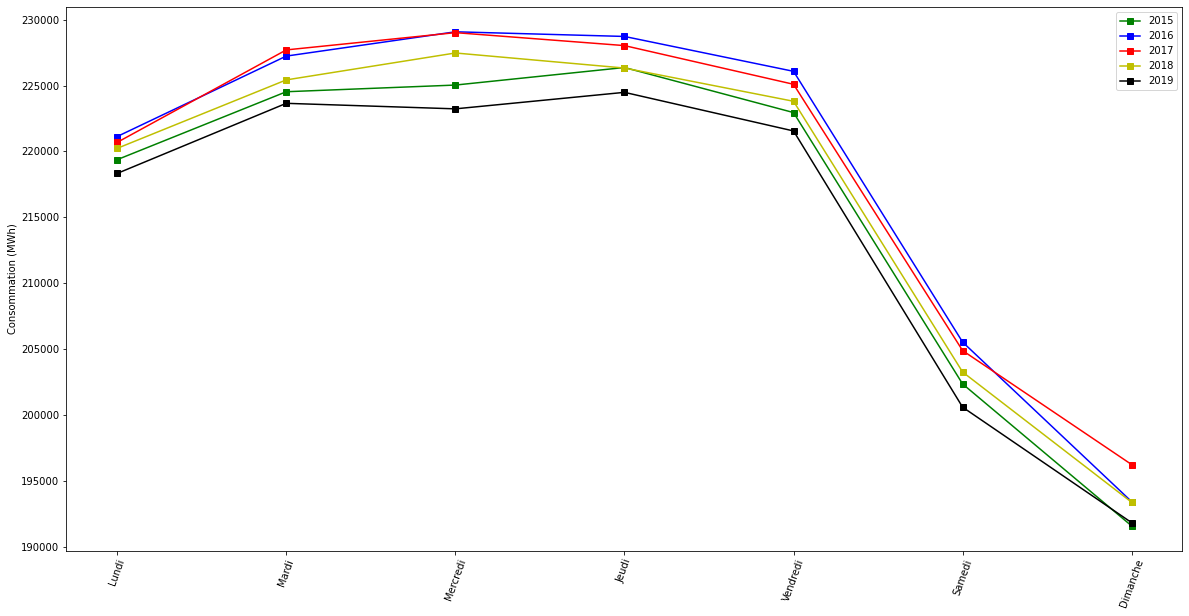

In [46]:
df_agg_j = df_rte.groupby(['Annee','Jour_semaine'], as_index=False ).agg({'Consommation (MW)' : 'mean'})          

plt.figure (figsize = (20,10))
plt.plot (df_agg_j['Jour_semaine'][(df_agg_j['Annee']== 2015)],df_agg_j['Consommation (MW)'][(df_agg_j['Annee'] == 2015)], "-gs" ,label = '2015')
plt.plot (df_agg_j['Jour_semaine'][(df_agg_j['Annee'] == 2016)],df_agg_j['Consommation (MW)'][(df_agg_j['Annee'] == 2016)], "-bs",label = '2016')
plt.plot (df_agg_j['Jour_semaine'][(df_agg_j['Annee'] == 2017)],df_agg_j['Consommation (MW)'][(df_agg_j['Annee'] == 2017)], "-rs",label = '2017')
plt.plot (df_agg_j['Jour_semaine'][(df_agg_j['Annee'] == 2018)],df_agg_j['Consommation (MW)'][(df_agg_j['Annee'] == 2018)], "-ys",label = '2018')
plt.plot (df_agg_j['Jour_semaine'][(df_agg_j['Annee'] == 2019)],df_agg_j['Consommation (MW)'][(df_agg_j['Annee'] == 2019)], "-ks",label = '2019')
plt.xticks(range(7), ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche'], rotation=70)
plt.ylabel('Consommation (MWh)')
plt.ticklabel_format(axis="y", style="plain")
plt.legend();

La consommation baisse fortement le samedi, et encore plus le dimanche, du fait de l'arrêt des gros consommateurs (gros industriels).

# Fichier météo

## Lecture du fichier

In [47]:
df_meteo = pd.read_csv((repertoire_data + fichier_meteo), sep = ',')

In [48]:
df_meteo.head()

,region,aaaammjj,annee,mois,joursem,jour,temp,humidite,nebulosite,nebulosite2,rafale_periode,vitesse_vent,pluie_1h,pluie_3h,pluie_6h,pluie_12h,pluie_24h
0,11,2015-01-01,2015,1,3,1,0.4000,84.250,30.6250,30.625,3.5875,1.8500,0.0,0.0,0.0,0.0,0.0
1,11,2015-01-02,2015,1,4,2,4.0625,88.375,73.7500,73.750,6.1250,3.2625,0.0,0.2,0.4,0.8,1.2
2,11,2015-01-03,2015,1,5,3,6.9250,93.125,92.0625,97.625,9.2750,4.5625,0.8,3.0,6.0,10.4,12.2
3,11,2015-01-04,2015,1,6,4,4.3250,83.750,72.5000,72.500,4.0500,2.2625,0.2,1.2,2.4,6.4,21.8
4,11,2015-01-05,2015,1,0,5,-0.3875,95.250,77.1250,77.125,2.3875,1.1375,0.0,0.0,0.0,0.0,0.0


# Croisement des df RTE et Météo

In [49]:
df_rte = df_rte.iloc[:, :19]
df_rte.head()

,Date,Jour_semaine,Annee,Mois,Code INSEE région,Région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),Solaire (MW),Hydraulique (MW),Pompage (MW),Bioénergies (MW),Ech. physiques (MW),Production totale (MW),Conso-Prod
0,2013-01-01,1,2013,2013-01,11,Île-de-France,399392,32478,0,340,100,0,0,6333,360051,39251,360141
1,2013-01-01,1,2013,2013-01,24,Centre-Val de Loire,103218,4236,438965,12262,357,1596,0,1150,-355429,458566,-355348
2,2013-01-01,1,2013,2013-01,27,Bourgogne-Franche-Comté,110467,10996,0,3737,57,5493,-5,596,89409,20874,89593
3,2013-01-01,1,2013,2013-01,28,Normandie,155860,20427,384145,6648,179,693,0,2523,-258889,414615,-258755
4,2013-01-01,1,2013,2013-01,32,Hauts-de-France,253829,38592,211166,25444,308,46,0,3130,-25001,278686,-24857


In [50]:
df_rte_meteo = df_rte.merge(
    right=df_meteo, 
    left_on=['Date', 'Code INSEE région'], 
    right_on=['aaaammjj', 'region'],
    how='inner')
df_rte_meteo = df_rte_meteo.drop(['aaaammjj', 'region', 'joursem', 'annee'], axis=1)
df_rte_meteo.head()

,Date,Jour_semaine,Annee,Mois,Code INSEE région,Région,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,humidite,nebulosite,nebulosite2,rafale_periode,vitesse_vent,pluie_1h,pluie_3h,pluie_6h,pluie_12h,pluie_24h
0,2015-01-01,3,2015,2015-01,11,Île-de-France,483411,18868,0,133,...,84.2500,30.62500,30.62500,3.58750,1.85000,0.0,0.0,0.0,0.0,0.0
1,2015-01-01,3,2015,2015-01,24,Centre-Val de Loire,135296,3685,513855,4398,...,83.7500,25.93750,31.40625,2.64375,1.40000,0.0,0.0,0.0,0.0,0.0
2,2015-01-01,3,2015,2015-01,27,Bourgogne-Franche-Comté,137886,4961,0,2279,...,93.0000,100.18750,100.18750,3.62500,1.77500,0.0,0.0,0.0,0.0,0.0
3,2015-01-01,3,2015,2015-01,28,Normandie,196708,17534,498774,13068,...,85.0625,85.78125,88.90625,8.23750,5.41875,0.0,0.2,0.4,0.6,1.4
4,2015-01-01,3,2015,2015-01,32,Hauts-de-France,303668,38290,255608,42765,...,80.5625,51.87500,58.43750,7.31875,4.54375,0.0,0.0,0.0,0.0,0.0


## Corrélations entre variables

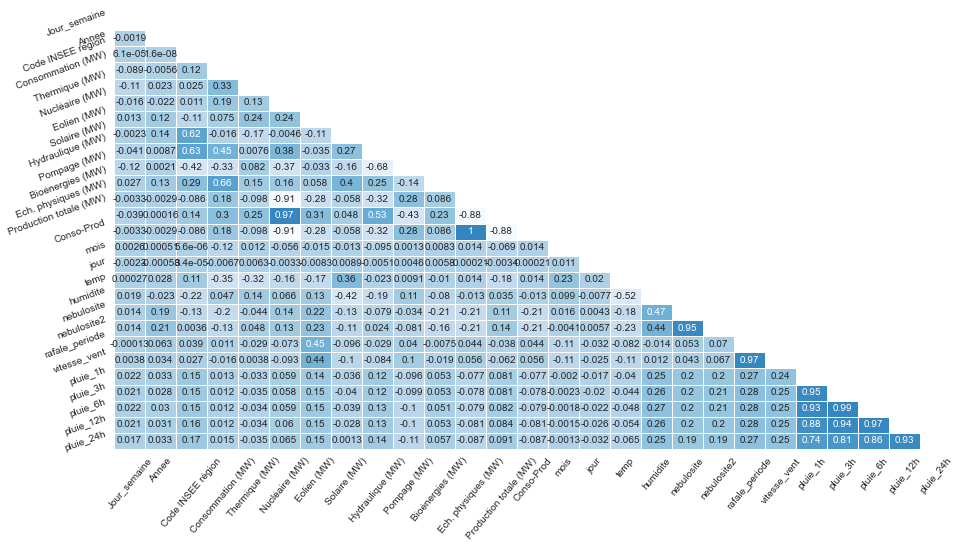

In [51]:
corr = df_rte_meteo.corr()
lower_triangle = np.tril(corr, k = -1)
mask = lower_triangle == 0

plt.figure(figsize = (15,8))  
sns.set_style(style = 'white')   
sns.heatmap(lower_triangle, center=0.5, cmap= 'Blues', annot= True, xticklabels = corr.index, yticklabels = corr.columns,
            cbar= False, linewidths= 1, mask = mask)   # 
plt.xticks(rotation = 50)    
plt.yticks(rotation = 20);

## Relation production éolienne et vitesse du vent

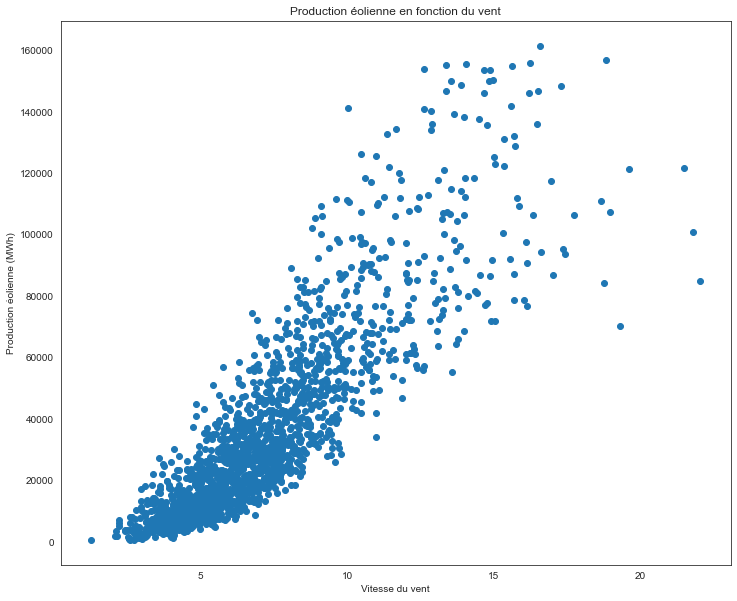

In [54]:
plt.figure(figsize=(12, 10))
plt.scatter(x=df_rte_meteo[df_rte_meteo['Code INSEE région']==32]['rafale_periode'], 
            y=df_rte_meteo[df_rte_meteo['Code INSEE région']==32]['Eolien (MW)'])
plt.xlabel('Vitesse du vent')
plt.ylabel('Production éolienne (MWh)')
plt.title('Production éolienne en fonction du vent');

On remarque clairement la corrélation entre production éolienne et vitesse du vent.

## Relation production solaire et nébulosité

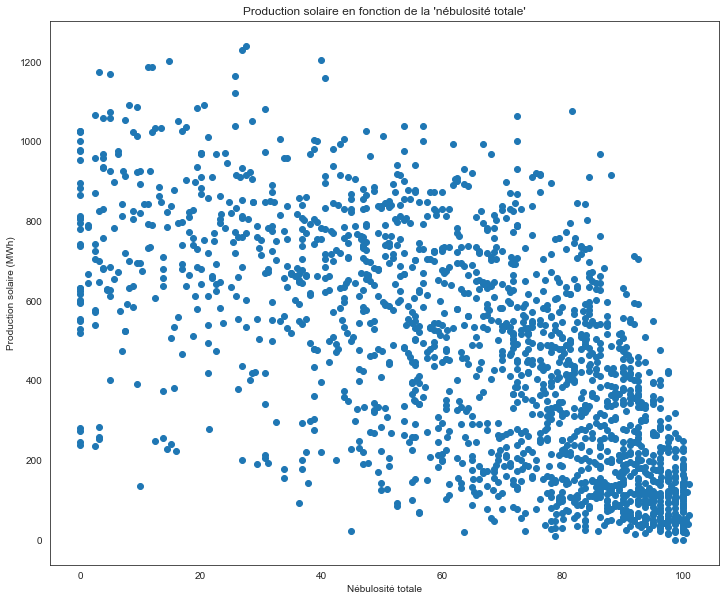

In [56]:
plt.figure(figsize=(12, 10))
plt.scatter(x=df_rte_meteo[df_rte_meteo['Code INSEE région']==11]['nebulosite'], 
            y=df_rte_meteo[df_rte_meteo['Code INSEE région']==11]['Solaire (MW)'])
plt.xlabel('Nébulosité totale')
plt.ylabel('Production solaire (MWh)')
plt.title("Production solaire en fonction de la 'nébulosité totale'");

On voit une corrélation entre la production solaire et la nébulosité, mais le lien n'est pas très net. Une des pistes est de revoir le traitement des valeurs manquantes dans le fichier météo (notamment en affectant une valeur 1 aux tranches 22h-1h et 1h-4h).

## Relation consommation et température

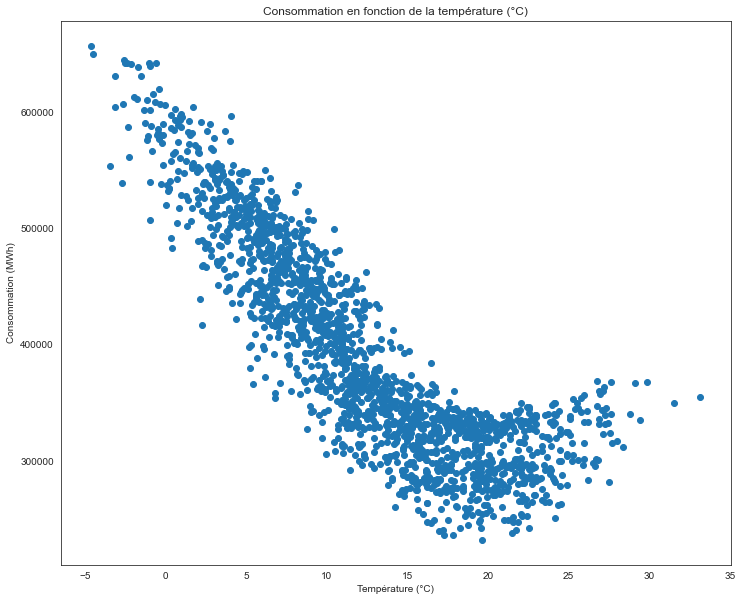

In [58]:
plt.figure(figsize=(12, 10))
plt.scatter(x=df_rte_meteo[df_rte_meteo['Code INSEE région']==11]['temp'], 
            y=df_rte_meteo[df_rte_meteo['Code INSEE région']==11]['Consommation (MW)'])
plt.xlabel('Température (°C)')
plt.ylabel('Consommation (MWh)')
plt.title('Consommation en fonction de la température (°C)');

On voit nettement la hausse de la consommation quand la température diminue. Au-delà d'une température d'environ 20°, la consommation augmente à nouveau du fait de la hausse de la climatisation.